In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# IMPORT DATA

In [ ]:
df = pd.read_excel('Data/obesitas smote.xlsx')


In [9]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.357078,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,23.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

In [12]:
for column in categorical_features:
    if column != 'Age': 
        print(df[column].value_counts())
        print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



# TRANSFORM KATEGORIK TO NUMERIK

In [13]:
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [14]:
df.to_excel('data transform.xlsx')

In [15]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# NORMALISASI DATA

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SPLIT DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODEL ML YANG DIGUNAKAN


In [18]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# MELATIH MODEL

In [19]:
results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)  
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) 

    report = classification_report(y_test, y_pred, output_dict=True)['weighted avg']
    results.append({
        'Model': model_name,
        'CV Mean Accuracy': scores.mean(),
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Precision': report['precision'],
        'Recall': report['recall'],
        'F1-Score': report['f1-score']
    })


results_df = pd.DataFrame(results)

# HASIL 

In [20]:
results_df

,Model,CV Mean Accuracy,Test Accuracy,Train Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.925944,0.940898,1.0,0.941344,0.940898,0.940952
1,Gradient Boosting,0.951427,0.950355,1.0,0.950481,0.950355,0.950141


In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [24]:
decision_tree_model = models["Decision Tree"]

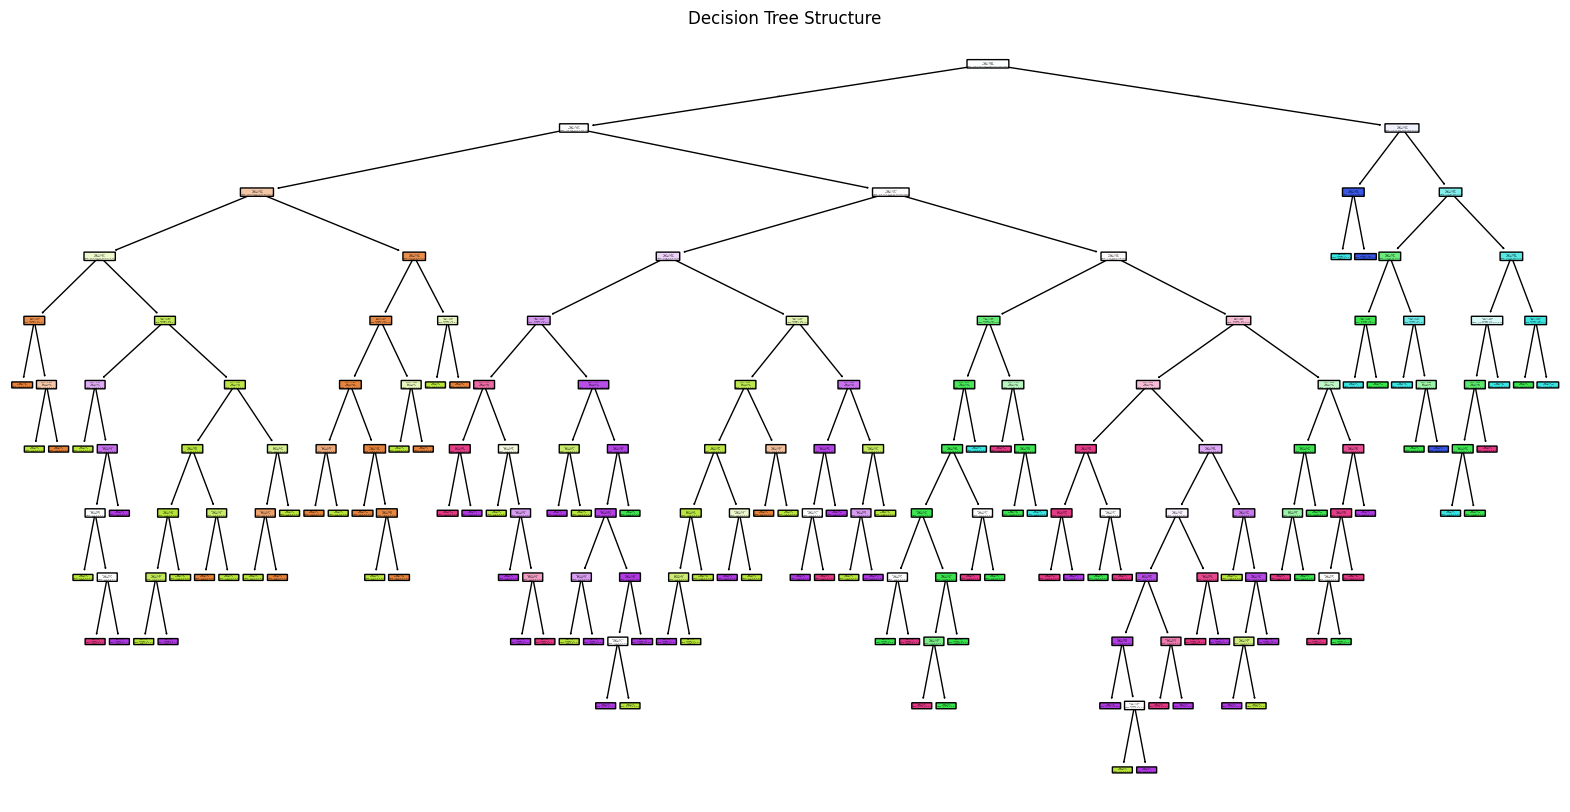

In [ ]:
class_names = [str(class_name) for class_name in decision_tree_model.classes_]

plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model,
    filled=True,
    class_names=class_names,
    rounded=True
)
plt.title("Decision Tree Structure")
plt.show()

# GRID SEARCH

In [ ]:
tuned_results = {}


param_grids = {
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30, 40, 50],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [3, 5, 7]
    }
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=3,
        scoring='accuracy',
        verbose=0
    )
    
  
    grid_search.fit(X_train, y_train)
    
   
    best_model = grid_search.best_estimator_
    
    
    y_pred = best_model.predict(X_test)
    
   
    cv_mean_score = grid_search.best_score_
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    

    tuned_results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "CV Mean Score": cv_mean_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

Tuning Decision Tree...
Tuning Gradient Boosting...


In [ ]:
for model_name, result in tuned_results.items():
    print(f"Results for {model_name}:")
    print(f"  CV Mean Score: {result['CV Mean Score']:.4f}")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")

Results for Decision Tree:
  CV Mean Score: 0.9295
  Best Parameters: {'max_depth': 50, 'min_samples_split': 2}
  Accuracy: 0.9409
  Precision: 0.9417
  Recall: 0.9409
  F1 Score: 0.9411
Results for Gradient Boosting:
  CV Mean Score: 0.9621
  Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
  Accuracy: 0.9622
  Precision: 0.9624
  Recall: 0.9622
  F1 Score: 0.9621
